# Data analysis of the red wine

### Introduction: 
This study will consider vinho verde, a unique product from the Minho (north-west) region of Portugal. This wine accounts for 15% of the total Portuguese production, and around 10% is exported. In this work, we will analyze the red wine from the region of vinho verde. We have different variables which characterize wine. Our main goal is to analyze which variables influence the quality of the red wine the most and give some recommendation on how to create high-quality red wine. For this, we will fit Linear Regression model.
### Recommendation on creating high-quality wine:
   * Focus on maintaining optimal levels of alcohol, total sulfur dioxide, and sulphates, as these factors has shown a positive and significant impact on wine quality. 
   * Minimize **pH**, **chlorides**, and **volatile acidity** levels during production, as these variables have demonstrated a significantly negative impact on wine quality. 
   * While **density**, **fixed acidity**, **residual sugar**, **citric acid** didn't show significant influence on the quality of wine, maintaining their balance is essential in producing the best wine.

### Data Collection
   * **Timeframe**: The data were collected over a period spanning from May 2004 to February 2007. This means the dataset includes observations over almost three years, capturing any seasonal and annual variations in the samples.
   * **Sample Type**: Only samples with PDO(Protected designation of origin) status tested at the official certification entity (CVRVV) were included in the dataset. This ensures that the data represents high-quality, certified products that conform to specific production standards.
   * **Method**: Automated system (iLab). iLab manages the entire process of wine sample testing, ensuring systematic and consistent data capture. Each entry in the raw data denotes a specific test (either analytical or sensory). Each row represents a distinct wine sample with all corresponding tests. Only the most common physicochemical tests were included.

To better understand the dataset, here are explanations for some of the key terms used:

- **CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes):**
  The Commission of Viticulture of the Vinho Verde Region. This official certification entity is responsible for overseeing the quality and origin of Vinho Verde wines, ensuring they meet the necessary standards for PDO status.

- **PDO (Protected Designation of Origin):**
  A certification that guarantees the product comes from a specific region and is produced in a traditional manner. It ensures the product's authenticity and quality. For wines, PDO certification indicates that the grapes are grown, and the wine is produced and bottled in a specific region following traditional methods.


### Dataset charactersitcs
1. **Variables**:
   * Physicochemical Tests Include:
       * Fixed Acidity: Measures the stable acids in the wine.
       * Volatile Acidity: Measures the content of acetic acid.
       * Citric Acid: Indicates the level of citric acid, which can affect taste.
       * Residual Sugar: The sugar remaining after fermentation.
       * Chlorides: Salt content in the wine.
       * Free Sulfur Dioxide: Measures the free SO2 that acts as a preservative.
       * Total Sulfur Dioxide: Total amount of SO2 present in the wine.
       * Density: Indicates sugar and alcohol content.
       * pH: Measures the acidity or alkalinity.
       * Sulphates: Additives that affect taste and preservation.
       * Alcohol: The alcohol content of the wine.
   * Sensory Analysis:
       * Quality. Each sample was evaluated by at least three assessors on a scale from 0 to 10. The median of these evaluations is our resulting variable.
2. **Sample size**: 1599 samples of red wine.

#### Before the analysis, we state the following two hypotheses:

**Hypothesis**: Wines with higher levels of fixed acidity are perceived to have higher quality due to their potential for improved aging ability.

**Null Hypothesis**: Fixed acidity levels in wine have no impact on perceived wine quality.



**Hypothesis**: Wines with higher density are perceived to have a fuller body and higher quality compared to wines with lower density.

**Null Hypothesis**: Density of wine has no impact on perceived wine quality.

Let's upload the data and take a look at it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from typing import List, Tuple
from matplotlib.ticker import FuncFormatter

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Check for missing values

In [6]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Check for duplicates

In [7]:
wine[wine.duplicated(keep=False)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5


We have a lot of duplicate rows. Therefore, let's get rid of them

In [8]:
wine = wine[~wine.duplicated()]

Get rid of spaces in column names

In [9]:
wine.columns = wine.columns.str.replace(" ", "")

## Exploratory data analysis

### We will explore:
   * The distributions and ranges of our features
   * Relationships between wine characteristics and the quality values
   * Correlations between all the available features
   * Multicollinearity of features

**The distributions and ranges of our features**

In [10]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
def plot_distributions(columns: List[str], nrows: int,
                       ncols: int, figsize: Tuple[int, int], 
                       data: pd.DataFrame) -> plt:
    """
    Function, which plots the histogram for the columns
    of the dataframe.
    Parameters:
        - columns(List[str]): list of columns to plot
        - nrows(int), ncolumns(int): number of rows and columns 
        in the figure
        - figsize(Tuple[int, int]): size of the figure
        - data: dataframe which the columns belong to
    Return:
        plt - pyplot object
    """
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.5)
    # iterate over each column
    for i, col in enumerate(columns):
        ax = fig.add_subplot(nrows, ncols, i+1)
        # plot the boxplot if the column is quality 
        if col == "quality":
            sns.countplot(x=col, data=wine, color="skyblue")
        else:
            sns.histplot(data=data, x=col, color="skyblue",
                         edgecolor="black", ax=ax, kde=True, alpha=0.5)
            kde_line = ax.lines[-1]
            kde_line.set_color('blue')
        if i % ncols == 0:
            ax.set_ylabel('Frequency', fontsize=12)  
        else:
            ax.set_ylabel("")
        ax.set_xlabel(col, fontsize=12)
    return plt

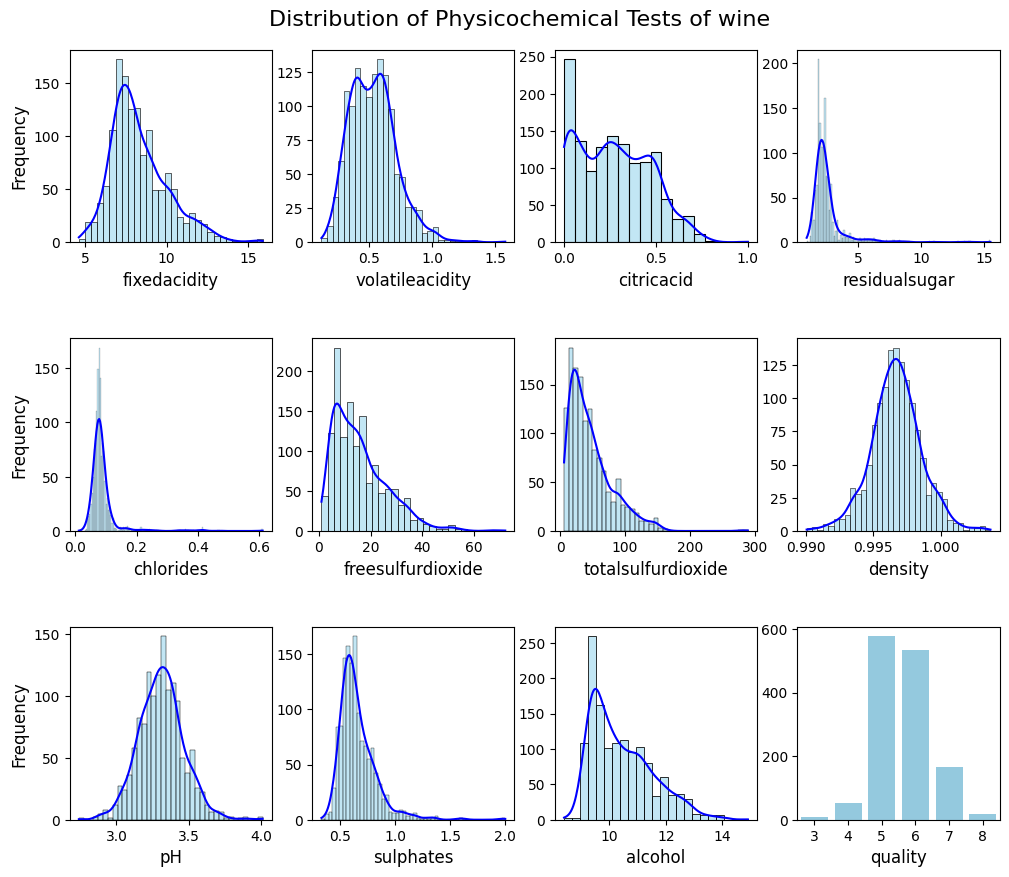

In [12]:
plt = plot_distributions(wine.columns, 3, 4, (12, 10), wine)
plt.suptitle("Distribution of Physicochemical Tests of wine",
            y=0.92, fontsize=16);

In [13]:
wine.skew()

fixedacidity          0.941041
volatileacidity       0.729279
citricacid            0.312726
residualsugar         4.548153
chlorides             5.502487
freesulfurdioxide     1.226579
totalsulfurdioxide    1.540368
density               0.044778
pH                    0.232032
sulphates             2.406505
alcohol               0.859841
quality               0.192407
dtype: float64

After using describe method, analyzing the histograms and skewness of the features we can write the following:
   * The distributions of **fixed acidity** and **sulphates** characteristics are similar and close to normal distribution. However, they have some right-skewness. Sulphates has more significant outliers. Its skewness is also pretty high(around 2.5).
   * The distribution of **volatile acidity** is close to bimodal. It is also a little bit right-skewed. The range of values is from 0.12 to 1.58.
   * The **citric acid** distribution is right-skewed. The maximum value is 1 gram of citric acid per litre.
   * Also, the distributions of **free sulfur dioxide**, **total sulfur dioxide** and **alcohol** are right-skewed. Total sulfure dioxide and free sulfur dioxide are more skewed.
   * **Residual sugar** and **Chlorides** both have similar distributions. It is similar to a normal distribution with very low variance. Both of these features are very skewed(>4). The ranges of these features are also different. Residual sugar has range - (0.5, 15.5), while Chlorides' range is (0.012, 0.611). 
   * **Density** and **pH** distributions are most similar to the normal distribution. The values of these features seem to not have significant outliers.
   * Values of the **Quality** feature range from 3 to 8. In addition, this feature is discrete. Therefore, there are only 6 possible values for this feature in our dataset. Most of the wines got a rating between 5 and 7. There are few wines which got 3, 4 or 8.

**Let's look visually into the relationships between Physicochemical Tests and the quality of wine**

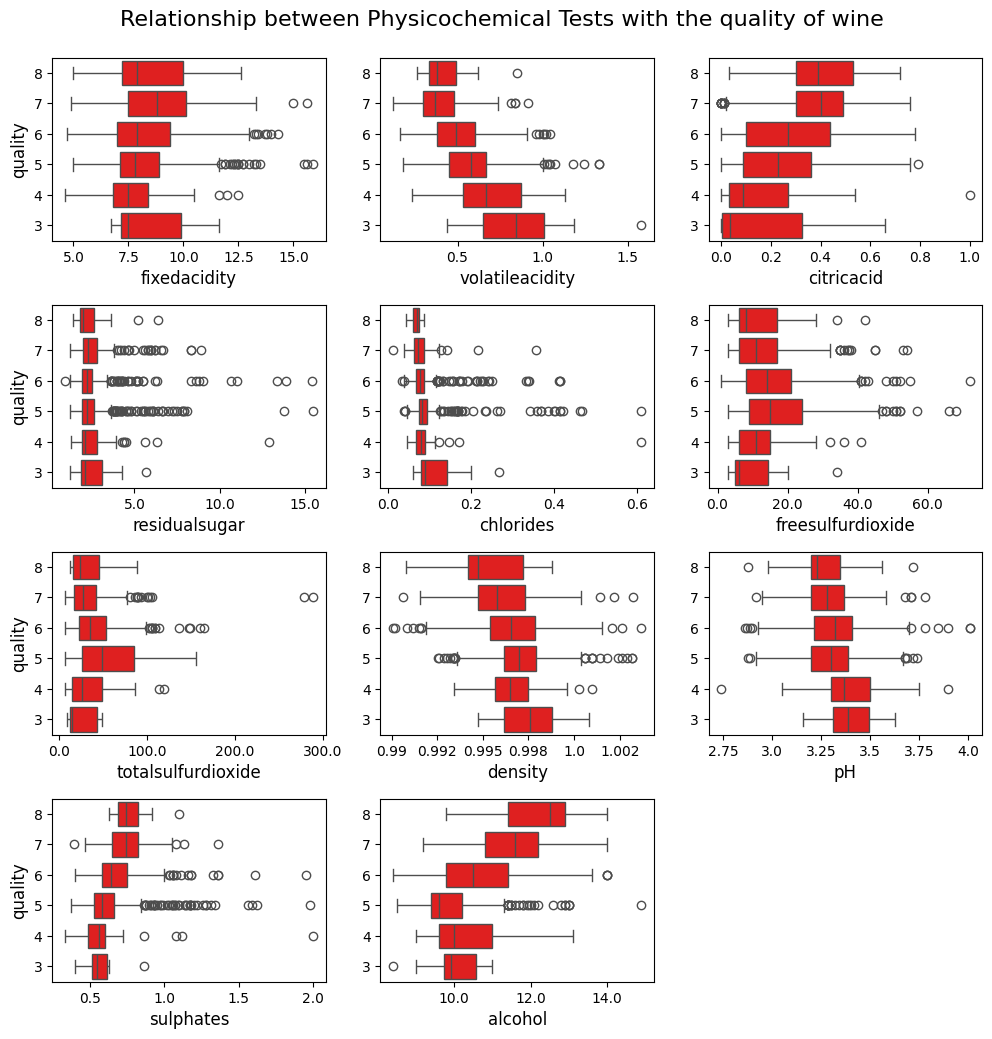

In [14]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.35)

# function which rounds ticks to 3 digits after decimals
def round_xticks(x, pos):
    """Function which rounds ticks to 3 digits after decimals"""
    return f'{round(x, 3)}'

for i, col in enumerate(wine.columns[:-1]):
    ax = fig.add_subplot(4, 3, i + 1)  
    sns.boxplot(data=wine, y="quality", x=col,
                ax=ax, color='red', orient="h", order=[8, 7, 6, 5, 4, 3])
    # set ylabel only for the left-most axes
    ax.set_xlabel(col, fontsize=12)
    if i % 3 == 0:
        ax.set_ylabel("quality", fontsize=12)
    else:
        ax.set_ylabel("")
    ax.xaxis.set_major_formatter(FuncFormatter(round_xticks))
plt.suptitle("Relationship between Physicochemical Tests"
             " with the quality of wine",
            fontsize=16, y=0.92);

There is no clear distinction between the level of fixed acidity of different qualities of wines. Interestingly, better wines tend to contain more citric acid. Also, wines with the lowest level of volatile acidity are more well-rated. We see some difference in quality between different levels of alcohol: the more alcohol wine has the better rate it gets. Density seems to be a little higher in low-quality of wines.

For feautres which have skewness > 0.5, let's apply logarithmic transformation to them. In addtion, let's standardize density feature, because it has a very tiny range, which may produce huge coefficient and the condition number in our model.

In [15]:
# list of features to apply log transformation
log_transform = ["fixedacidity", 
                 "volatileacidity",
                 "residualsugar", 
                 "freesulfurdioxide",
                 "totalsulfurdioxide", 
                 "sulphates", "alcohol", "chlorides"]

for column in log_transform:
    wine.loc[:, column + "_log"] = np.log(wine[column])
    
# apply standard transformation to the density feature
scaler = StandardScaler()
density_scaled = scaler.fit_transform(wine[['density']])
wine.loc[:, 'density_standardized'] = density_scaled

In [16]:
# check the skewness of the newly created columns
transformed_columns = [column + "_log" for column in log_transform]
transformed_columns.append("density_standardized")
wine[transformed_columns].skew()

fixedacidity_log          0.348804
volatileacidity_log      -0.330795
residualsugar_log         1.765238
freesulfurdioxide_log    -0.220069
totalsulfurdioxide_log   -0.078161
sulphates_log             0.961460
alcohol_log               0.663359
chlorides_log             1.887642
density_standardized      0.044778
dtype: float64

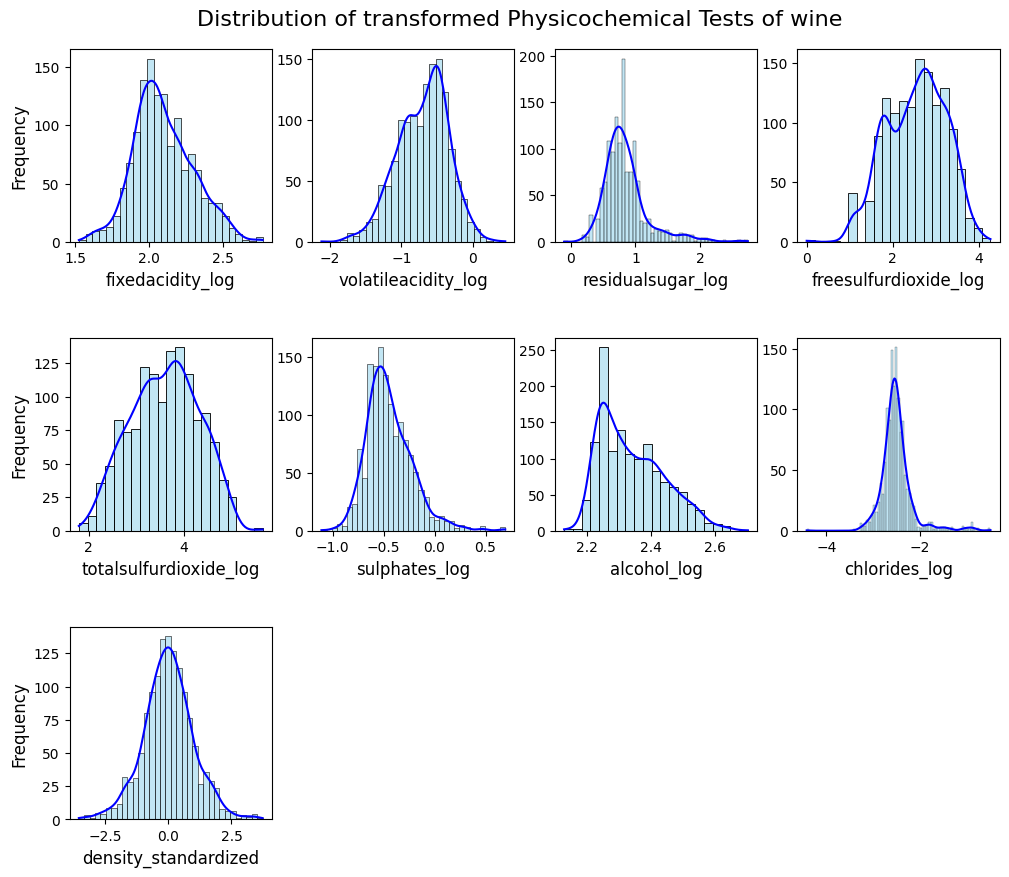

In [17]:
plt = plot_distributions(transformed_columns, 3, 4, (12, 10), wine)
plt.suptitle("Distribution of transformed Physicochemical Tests of wine",
            y=0.92, fontsize=16);

We see that now the skewness of the feautures is smaller. For residual sugar and chlorides, it has decreased from around 5 to around 1.8.

**Let's check correlations between all of the features in our dataset**

We will look into correlation coefficients of our original and transformed features

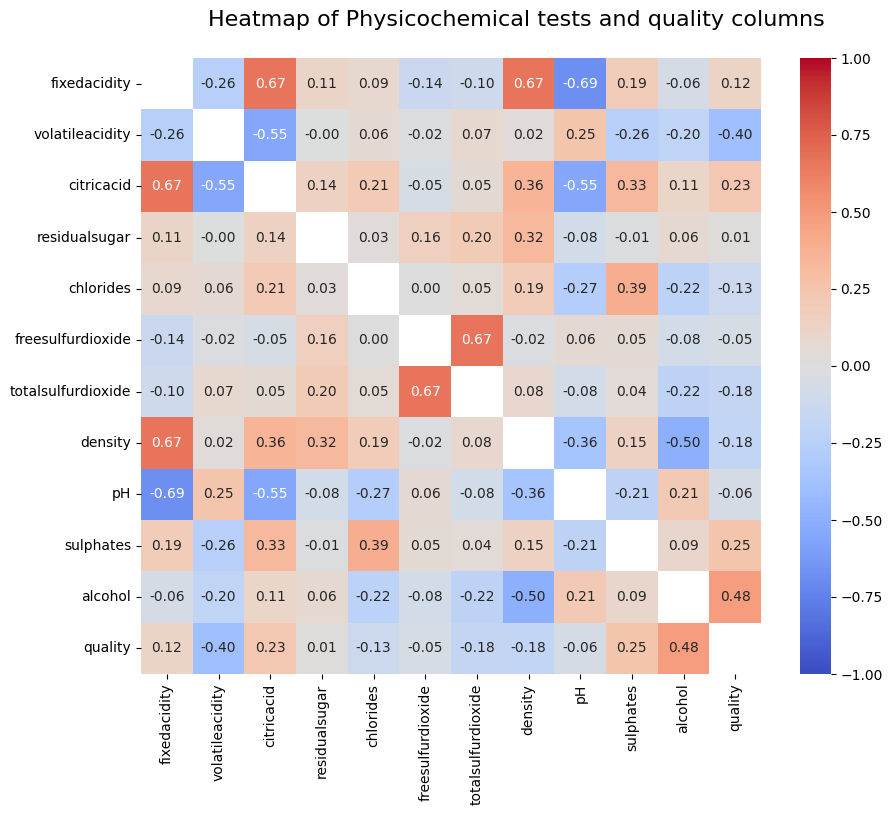

In [18]:
fig = plt.figure(figsize=(10, 8))
corr_coef = wine.iloc[:, :12].corr()
# fill the diagonal coefficients with zeroes
np.fill_diagonal(corr_coef.values, np.nan)
sns.heatmap(corr_coef, cmap="coolwarm", annot=True,fmt='.2f',
           vmin=-1, vmax=1)
plt.suptitle("Heatmap of Physicochemical tests and quality columns",
            fontsize=16, y=0.94);

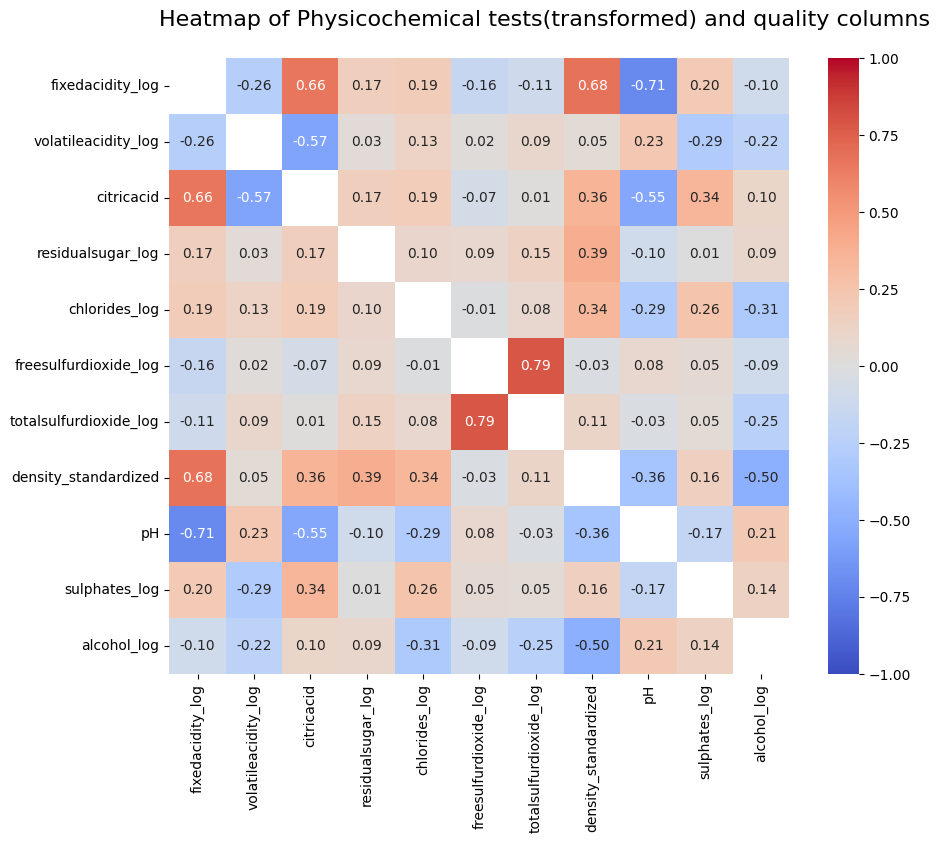

In [19]:
fig = plt.figure(figsize=(10, 8))
new_columns = ["fixedacidity_log", "volatileacidity_log", "citricacid",
              "residualsugar_log", "chlorides_log", "freesulfurdioxide_log",
              "totalsulfurdioxide_log", "density_standardized", "pH", 
               "sulphates_log", "alcohol_log"] 
corr_coef = wine[new_columns].corr()
np.fill_diagonal(corr_coef.values, np.nan)
sns.heatmap(corr_coef, cmap="coolwarm", annot=True,
            fmt='.2f', vmin=-1, vmax=1)
plt.suptitle("Heatmap of Physicochemical tests(transformed)"
            " and quality columns", fontsize=16, y=0.94);

**pH and fixed acidity** are negatively correlated. The correlation coefficient between these two features is even higher after applying logarithmic transformation to fixed acidity column. This is not suprising, considering that pH indicates acidity or alcalinity of wine. **Citric acid and fixed acidity** are also correlated. This is due to the fact that fixed acidity contains citric acidity. **Density** is moderately correlated with a lot of features, which indicates that this feature is influenced by a lof of different factors. **Free sulfur dioxide and total sulfur dioxide** are highly correlated, which is because total sulfur dioxide contains free sulfur dioxide.

**Our next objective is to check for multicollinearity between features**

In [20]:
def calculate_vif(predictors: List[str], data: pd.DataFrame) -> pd.DataFrame:
    """Function which calculates Variance Inflation Factor
    for the specified columns in the dataframe
    Parameters:
        - predictors(List[str]): list of columns for which to
        calculate the VIF
        - data(pd.DataFrame): data where the columns are
    Return:
    pd.Dataframe - the dataframe where one column are the names
    of features and another are their values"""
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = predictors
    vif_data["VIF"] = [variance_inflation_factor(data[predictors].values, i) 
                       for i in range(len(data[predictors].columns))]
    return vif_data

In [6]:
# add a constant column
wine = sm.add_constant(wine)
predictors = transformed_columns + ["pH", "citricacid", "const"] 
calculate_vif(predictors, wine)

NameError: name 'transformed_columns' is not defined

We have two features for which variance influence factor is higher than 5: **fixed acidity** and **density**. Let's drop fixed acidity now and calculate VIF again.

In [22]:
predictors.remove("fixedacidity_log")

In [23]:
calculate_vif(predictors, wine)

,feature,VIF
0,volatileacidity_log,1.864656
1,residualsugar_log,1.506013
2,freesulfurdioxide_log,2.865511
3,totalsulfurdioxide_log,3.089678
4,sulphates_log,1.364396
5,alcohol_log,2.341473
6,chlorides_log,1.396197
7,density_standardized,2.586629
8,pH,1.649539
9,citricacid,2.791415


Now, all of our features have pretty low VIF values.

**Now, our goal is to fit a linear regression model on these features and inspect the result**

It's important to note that wine quality is represented by only 6 discrete values. While linear regression predicts continuous values, which may not align perfectly with these discrete categories, our primary goal here is explanation rather than precise prediction. That is why this model is our choice in this analysis

Before fitting, let's separate 20% of our dataset as the holdout set.

In [7]:
train_wine, holdout_wine = train_test_split(wine, 
                                            test_size=0.2, 
                                            random_state=42)
y_train = train_wine["quality"]

In [9]:
train_wine

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,1.0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,1.0,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,1.0,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,1.0,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,1.0,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
1294,1.0,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
860,1.0,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1459,1.0,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


In [14]:
# train_wine["squared"] = train_wine["alcohol"] ** 2
# train_wine["cubic"] = train_wine["alcohol"] ** 3
# train_wine["fourth"] = train_wine["alcohol"] ** 4
train_wine["fifth"] = train_wine["alcohol"] ** 5
train_wine["sixth"] = train_wine["alcohol"] ** 6
train_wine["seventh"] = train_wine["alcohol"] ** 7
train_wine["eighth"] = train_wine["alcohol"] ** 8
train_wine["ninth"] = train_wine["alcohol"] ** 9
train_wine["tenth"] = train_wine["alcohol"] ** 10
res = sm.OLS(y_train, train_wine[["alcohol", "const", 
                                  "cubic", "fourth",
                                 "fifth", "sixth", "seventh",
                                 "eighth", "ninth", "tenth"]]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     55.68
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.26e-69
Time:                        11:06:56   Log-Likelihood:                -1368.9
No. Observations:                1279   AIC:                             2754.
Df Residuals:                    1271   BIC:                             2795.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        1.1180      8.302      0.135      0.893     -15.170      17.406
const          0.3454      2.555      0.135      0.892      -4.667       5.358
cubic          2.9351     22.667      0.129      0.897     -41.533      47.403
fourth        -2.1974     14.448     -0.152      0.879     -30.543      26.148
fifth          0.6716      3.858      0.174      0.862      -6.898       8.241
sixth         -0.1104      0.566     -0.195      0.845      -1.220       0.999
seventh        0.0106      0.049      0.215      0.830      -0.086       0.107
eighth        -0.0006      0.003     -0.234      0.815      -0.006       0.004
ninth       1.856e-05   7.38e-05      0.252      0.801      -0.000       0.000
tenth      -2.422e-07   9.03e-07     -0.268      0.789   -2.01e-06    1.53e-06
==============================================================================
Omnibus:                       37.223   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.889
Skew:                          -0.151   Prob(JB):                     2.01e-17
Kurtosis:                       4.162   Cond. No.                     8.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.53e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
first_res = sm.OLS(y_train, train_wine[predictors]).fit()
first_res.summary()

NameError: name 'predictors' is not defined

Our R-squared is 0.356, which indicates that our model explains only 35% of the variance in wine quality.

The p-value for the F-statistic is extremelly small suggesting that overall our model is statistically significant.

Three of our features have p-values above the 0.05 significance level, indicating they are not statistically significant: **log(residual sugar)**(0.903), **standartized(density)**(0.44), **citricacid**(0.11). 

Interestingly, **log(free sulfur dioxide)** has a negative coefficient, while **log(total sulfur dioxide)** has a positive one. This contrast is noteworthy because, despite log(free sulfur dioxide) being significant, its p-value is very close to 0.05, and its confidence interval is relatively wide.

**log(alcohol)** has the highest coefficient among all features, with a confidence interval of (2.531, 3.73). This indicates a strong positive impact of alcohol content on wine quality. While it is challenging to determine the exact effect sizes of the features due to their logarithmic transformation, the positive coefficient for log(alcohol) suggests that higher alcohol content is associated with better wine quality.

**log(volatile acidity)** has a negative coefficient around 0.5. This suggest that it is important to keep the level of volatile acidity at a small level to make a good wine. Likewise, negative coefficient for the **log(chlorides)** and **pH** tells us that those features have negative impact on the wine. 

**log(sulphates)** has positive coefficient with the confidence interval (0.571, 0.982). Therefore, sulphates have positive effect on the quality of wine.


Let's also test the model:

In [26]:
from statsmodels.regression.linear_model import RegressionResultsWrapper

In [27]:
def test_model(model: RegressionResultsWrapper, 
               predictors: List[str], 
               data: pd.DataFrame) -> Tuple[str, str, str]:
    """Function which calculates MSE, RSE and R-squared
    for the model on the test dataset
    Parameters:
        - model(RegressionResultsWrapper): model to test
        - predictors(List[str]): list of predictors in the model
        - data(pd.DataFrame): holdout dataset
    Return:
        - Tuple[str, str, str] - values of MSE, RSE and R-squared
    """
    X_test = data[predictors]
    y_pred = model.predict(X_test)
    mse = mean_squared_error(data["quality"], y_pred)
    r2 = r2_score(data["quality"], y_pred)
    residuals = model.resid
    RSE = np.sqrt(np.sum(residuals**2) / (len(data) - len(predictors) - 1))
    return f"mse: {mse}", f"RSE: {RSE}", f"r-squared: {r2}"

In [28]:
test_model(first_res, predictors, data=holdout_wine)

('mse: 0.42976705759243705',
 'RSE: 1.3419908195288421',
 'r-squared: 0.3932893317892866')

While the average prediction error (MSE) is relatively low (0.43), the spread of individual prediction errors (RSE) is quite high (1.34 units), suggesting variability in prediction accuracy across different instances.

This R-squared value is higher than that observed on the training data, suggesting that the model generalizes well to unseen data and is not overfitting. However, the relatively low R-squared also indicates a high bias, suggesting that the model may not capture all relevant features or relationships in the data.

Now, let's analyze residuals:

In [29]:
def resid_analysis_plot(model: RegressionResultsWrapper, 
                        figsize: Tuple[int, int], data: pd.DataFrame) -> plt:
    """
    Function which plots the box plot of possible value
    of the quality feature and the scatter of residuals and 
    fitted values
    Parameters:
        - model(RegressionResultsWrapper): model that we fitted
        - figsize(Tuple[int, int, int]): size of the figure
        - data(pd.DataFrame): dataset for which to plot
    Return:
        - plt
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    sns.boxplot(y=model.resid, x=data["quality"], ax=ax[0],
               color="red")
    sns.scatterplot(y=model.resid, x=model.fittedvalues, ax=ax[1],
                   color="blue", alpha=0.5)

    ax[0].set_xlabel("Possible values")
    ax[0].set_ylabel("Residuals")

    ax[1].set_xlabel("Fitted values")
    ax[1].set_ylabel("Residuals")
    return plt

In [30]:
def predictor_resid_plot(model: RegressionResultsWrapper, 
                         predictors: List[str], 
                         figsize: Tuple[int, int], 
                         ncolumns: int, nrows: int,
                        data: pd.DataFrame) -> plt:
    """
    Function which plots the residuals agains the values
    of each predictor in the model
    Parameters:
        - model(RegressionResultsWrapper): model that we fitted
        - figsize(Tuple[int, int, int]): size of the figure
        - data(pd.DataFrame): dataset for which to plot
        - ncolumns, nrows: how many columns and rows of axes 
        in the figure
        - predictors(List[str]): list of the predictors
    Return:
        - plt
    """
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    columns_to_plot = [predictor for predictor in predictors
                      if predictor != "const"]
    for i, predictor in enumerate(columns_to_plot):
        ax = fig.add_subplot(nrows, ncolumns, i+1)
        if i % 2 == 0:
            ax.set_ylabel("Residuals")
        sns.scatterplot(x=data[predictor], y=model.resid, ax=ax,
                        color="blue", alpha=0.5)
    return plt

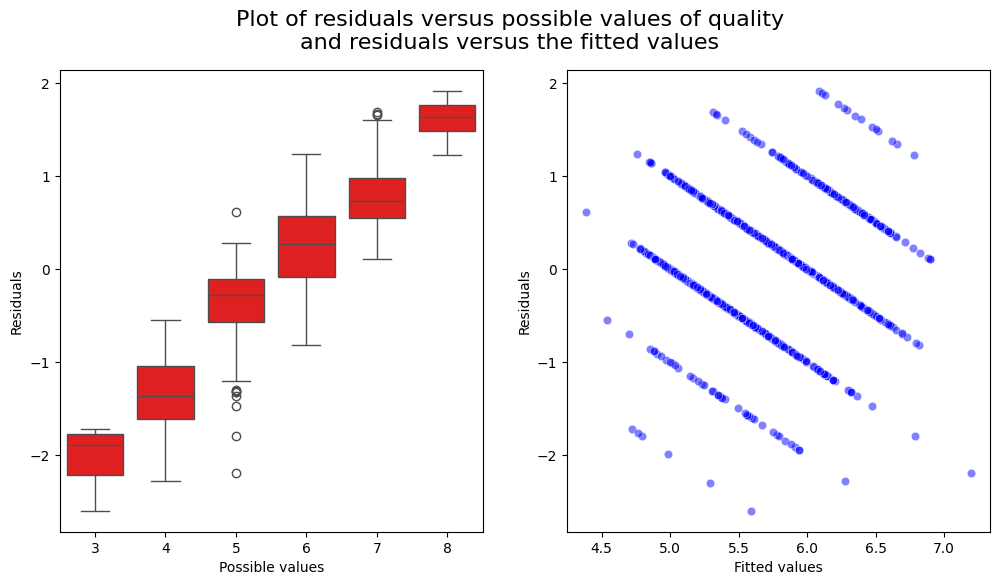

In [31]:
plt = resid_analysis_plot(first_res, (12, 6), data=train_wine)
plt.suptitle("Plot of residuals versus possible values of quality\n"
            "and residuals versus the fitted values", fontsize=16);

We observe that the residuals tend to increase as the value of the quality variable increases. Specifically, for the lowest quality ratings, the residuals are around -2, whereas for the highest quality ratings, they can go up to 2. This pattern is not surprising, given that we fitted a linear model to a discrete quality variable with 6 ordered levels. However, this trend suggests there might be an issue with non-linearity in the data. To investigate further, let's plot each predictor against the residuals.

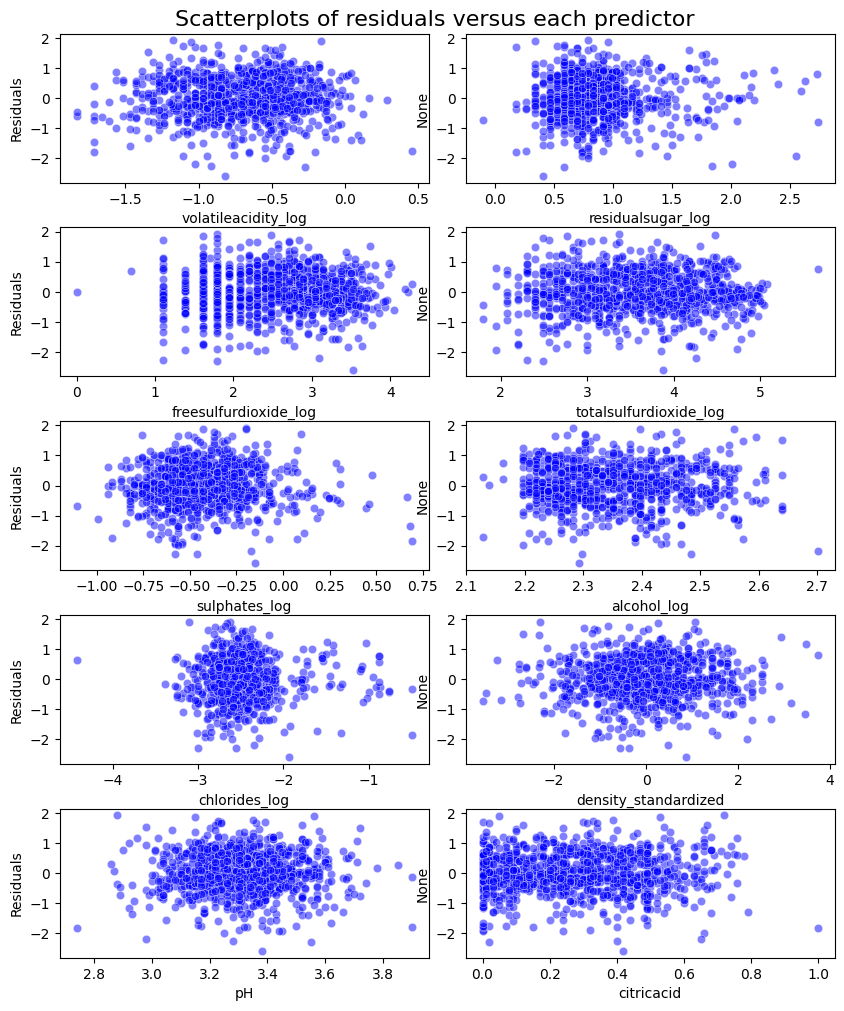

In [32]:
plt = predictor_resid_plot(first_res, predictors, 
                           (10, 12), 2, 5, data=train_wine)
plt.suptitle("Scatterplots of residuals versus each predictor",
            fontsize=16, y=0.9);

For each of the predictor, the residuals are scattered around 0, which suggest that non-linearity might not be the cause of the above trend with residuals.

Now, let's find out whether fixed acidity has an effect on the quality of wine. Let's drop density from the list of predictors and add fixed acidity.

In [33]:
predictors.append("fixedacidity_log")
predictors.remove("density_standardized")

In [34]:
calculate_vif(predictors, data=wine)

,feature,VIF
0,volatileacidity_log,1.824085
1,residualsugar_log,1.133175
2,freesulfurdioxide_log,2.875542
3,totalsulfurdioxide_log,3.197651
4,sulphates_log,1.300004
5,alcohol_log,1.458743
6,chlorides_log,1.418161
7,pH,2.302201
8,citricacid,3.008511
9,const,2617.240027


All of the VIF values are less than 5, let's fit the model

In [35]:
second_res = sm.OLS(y_train, train_wine[predictors]).fit()
second_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     59.52
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           7.75e-96
Time:                        21:13:56   Log-Likelihood:                -1084.8
No. Observations:                1087   AIC:                             2192.
Df Residuals:                    1076   BIC:                             2247.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
volatileacidity_log       -0.4719      0.077     -6.113      0.000      -0.623      -0.320
residualsugar_log          0.0316      0.061      0.516      0.606      -0.088       0.152
freesulfurdioxide_log      0.1001      0.050      1.995      0.046       0.002       0.199
totalsulfurdioxide_log    -0.1578      0.051     -3.120      0.002      -0.257      -0.059
sulphates_log              0.7905      0.103      7.698      0.000       0.589       0.992
alcohol_log                3.0034      0.242     12.404      0.000       2.528       3.478
chlorides_log             -0.2910      0.070     -4.166      0.000      -0.428      -0.154
pH                        -0.6559      0.201     -3.267      0.001      -1.050      -0.262
citricacid                -0.2661      0.178     -1.494      0.135      -0.616       0.083
const                      0.2420      1.046      0.231      0.817      -1.810       2.294
fixedacidity_log           0.0926      0.171      0.541      0.589      -0.243       0.428
==============================================================================
Omnibus:                       21.913   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.710
Skew:                          -0.224   Prob(JB):                     3.54e-07
Kurtosis:                       3.675   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of this model is almost the same: The confidence interval for the coefficient of log(fixed acidity) is (-0.243, 0.428). This suggests that we fail to reject the null hypothesis. We fail to prove the positive effect of fixed acidity on the quality of wine.

Let's test the newly fitted model, and inspect the residuals:

In [36]:
test_model(second_res, predictors, data=train_wine)

('mse: 0.4308889384624055',
 'RSE: 0.6600748908240673',
 'r-squared: 0.35615083853080864')

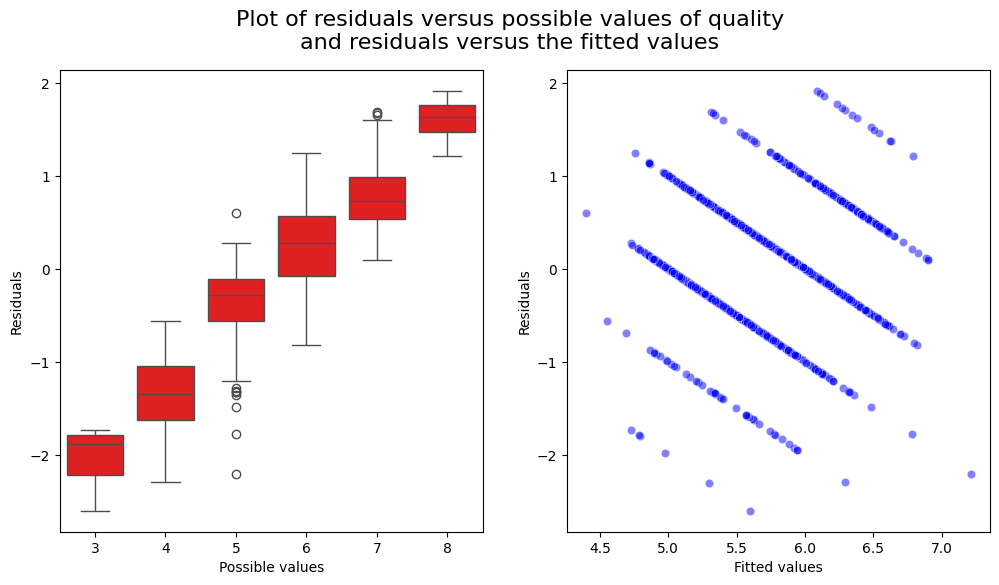

In [37]:
resid_analysis_plot(second_res, (12, 6), data=train_wine)
plt.suptitle("Plot of residuals versus possible values of quality\n"
            "and residuals versus the fitted values", fontsize=16);

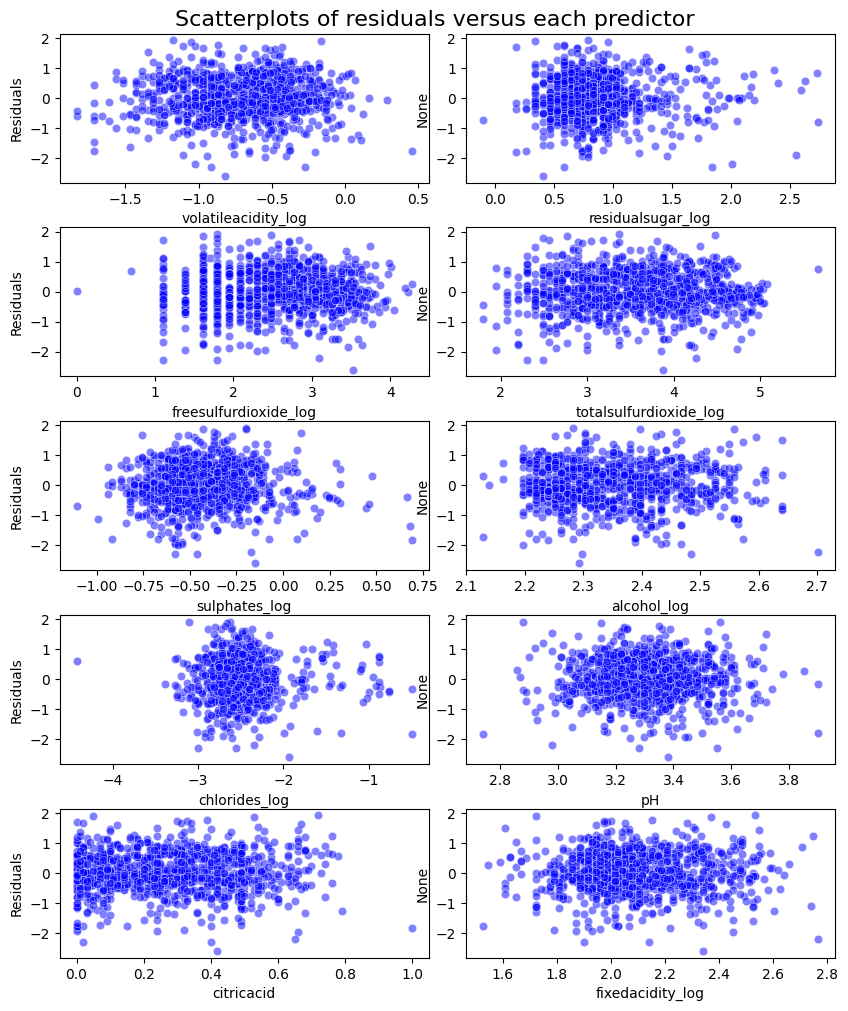

In [38]:
predictor_resid_plot(second_res, predictors, (10, 12), 2, 5, data=train_wine)
plt.suptitle("Scatterplots of residuals versus each predictor",
            fontsize=16, y=0.9);

We see that the results are pretty similar to our first model.

### Conclusion:
   * We failed to reject both of our hypotheses, specified at the start of the analysis. Thus, we can conclude that there is no significant impact of density and fixed acidity on the quality of red wine.
   * **Residual sugar**, **Citric acid** showed no significant impact on the quality of wine.
   * **Alcohol**, **total sulfur dioxide**, **sulphates** showed positive significant impact on the quality of wine. Alcohol seem to have the largest impact, considering that the confidence interval for coefficient of log(alcohol) is (2.531, 3.73) which is way higher than other coefficients.
   * **pH**, **chlorides**, **volatile acidity** showed significantly negative impact on the quality of wine.
   
### Recommendations:
   * Focus on maintaining optimal levels of Alcohol, total sulfur dioxide, and sulphates, as these factors have shown a positive and significant impact on wine quality. 
   * Minimize pH, chlorides, and volatile acidity levels during production, as these variables have demonstrated a significantly negative impact on wine quality. 
   * While **density**, **fixed acidity**, **residual sugar**, **citric acid** didn't show significant influence on the quality of wine, maintaining their balance is essential in producing the best wine

#### Suggestion on improving the analysis:
  * We could gather the data on the different segments of wine consumers(nationality, age, etc.) and analyze how different groups respond to wine factors
  * Gather data on the production year of wine and analyze how the quality factors changed over time
  * Fitt classification model which predicts the quality of wine based on the provided factors and analyze how these variables are useful in predicting the quality of wine.